<a href="https://colab.research.google.com/github/Shulliikkk/Researchs/blob/main/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.5199999999986223e-10
-3.9848508038439345e-08
-1.525676703998627e-07
-3.162045701130145e-07
-4.979556925850711e-07
-6.587117625642206e-07
-7.592825207731887e-07
-7.676047315451111e-07
-6.664165816932286e-07
-4.608466132057963e-07
-1.8536746683367647e-07
9.11673303205857e-08
3.066236246504925e-07
4.5007834435353625e-07
5.201213182209171e-07
5.206410831156835e-07
4.608100098759178e-07
3.548142065869824e-07
2.2134565194528616e-07
8.288449298943652e-08
-3.537430434858376e-08
-1.1763283715862723e-07
-1.6550066979070654e-07
-1.8283427556310692e-07
-1.7406542077894881e-07
-1.439968708825873e-07
-9.760098526227334e-08
-3.982836934072155e-08
2.4567243232212573e-08
9.118282975239978e-08
1.5609478688224176e-07
2.1595987111177576e-07
2.6808691875703814e-07
3.104790151876216e-07
3.418468062480358e-07
3.6159455420285555e-07
3.6978131674231975e-07
3.6706026444409954e-07
3.5459964631196123e-07
3.339892672183374e-07
3.0713655773756467e-07
2.76156406518218e-07
2.4325889577588396e-07
2.1063894305984702e

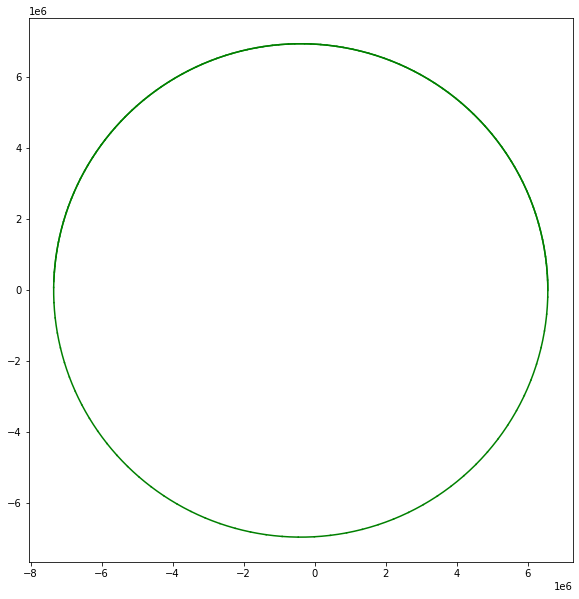

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from math import sin, cos, sqrt

h =   np.array([0,  500,  1000,  1500,  2000,  2500,  3000,  4000,  5000,  6000,  7000,  8000,  9000,  10000,  11000,  12000,  14000,  16000,  18000,  20000,  24000,  28000,  32000,  36000,  40000,  50000,  60000,  80000,  100000, 150000, 200000, 300000, 500000, 700000,  1000000])
ro =  np.array([1.2250 ,  1.1673,  1.1117,  1.0581,  1.0065,  0.9569,  0.9093,  0.8194,  0.7365,  0.6601,  0.59,  0.5258,  0.4671,  0.4135,  0.3648,  0.3119,  0.2279,  0.1665,  0.1216,  0.0889,  0.0469,  0.0251,  0.0136,  7.26e-3,  4.00e-3,  1.03e-3,  3.00e-4,  1.85e-5,  5.55e-7,  2.00e-9, 2.52e-10, 1.92e-11, 5.21e-13, 3e-14, 3.56e-15 ])
Ro = interp1d(h, ro, kind='cubic')

T = 24 #продолжительность расчета в часах
dt = 0.001
one_minutes = 60 #количество секунд в 1 минуте

M = 5.97e24 # масса Земли в килограммах
R = 6371e3 # радиус Земли в метрах
G = 6.67e-11 # гравитациооная постоянная в СИ
mu = -G * M

S = 0.0001
m = 2
Cx = 2

def equation(param, t):
  z1, z2, z3, z4 = param
  deriv = np.array([z2, (mu/(z1*z1 + z3*z3))*(z1/sqrt(z1*z1 + z3*z3)) - Cx*(S/m)/2*10e-9*z2*sqrt(z2*z2 + z4*z4), z4, (mu/(z1*z1 + z3*z3))*(z3/sqrt(z1*z1 + z3*z3)) - Cx*(S/m)/2*10e-9*z4*sqrt(z2*z2 + z4*z4)])
  return deriv

phi = 0
h = 200e3
vx0 = 0
vy0 = 8e3

param0 = np.array([(R+h)*cos(phi), vx0, (R+h)*sin(phi), vy0])

t = np.linspace(0, one_minutes, num = int(one_minutes/dt))

fig = plt.figure(figsize=(10, 10))
for i in range(6*T):
  solution = odeint(equation, param0, t)
  x = solution[:, 0]
  vx = solution[:, 1]
  y = solution[:, 2]
  vy = solution[:, 3]
  print(Ro(sqrt(x[0]*x[0] + y[0]*y[0]) - R))
  plt.plot(x, y, color = 'green')
  param0 = np.array([x[-1], vx[-1], y[-1], vy[-1]])
plt.axis('square')
plt.show()
